# Accident EDA

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/gkbin/Downloads/data/US_Accidents_March23.csv")


In [3]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# Information about the dataframe

In [4]:
df.shape

(7728394, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [8]:
df.describe(include=object)

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7728394,7728394,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7553188,7554935,7705148,7705148,7705148,7705148
unique,7728394,3,6131796,6705355,3761578,336306,13678,1871,49,825094,1,4,2045,941331,24,144,2,2,2,2
top,A-1,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,4325632,225,112,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,961624,2560802,5334553,5695619,6076156,6377548


In [9]:
# Null/Missing Values

In [10]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)


In [12]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']

In [13]:
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)


In [15]:
df.isna().sum()


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
d

In [16]:
df.duplicated().sum()

0

# City with most Number of Accidents

In [17]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()


In [18]:
city_acc

,City,count
0,Miami,187170
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


# 10 cities with most number of accidents


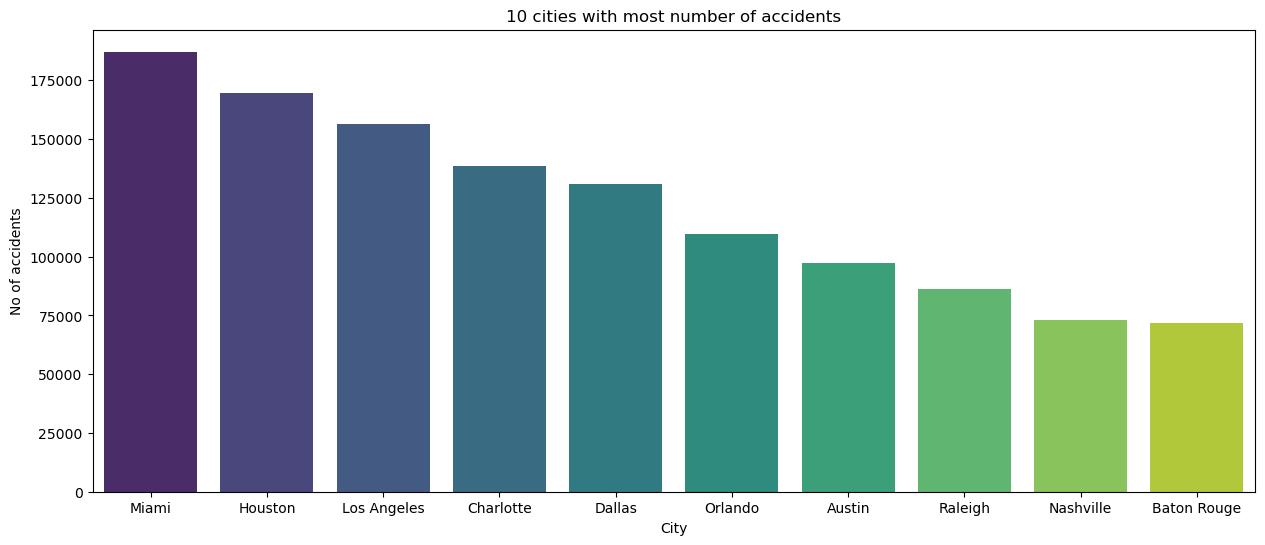

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.head(10),palette='viridis')
plt.title("10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

Miami is the city with most number of accidents

Miami stands out as the city with the highest number of accidents. This could be attributed to its high population density and traffic volume.

# 10 cities with least number of accidents


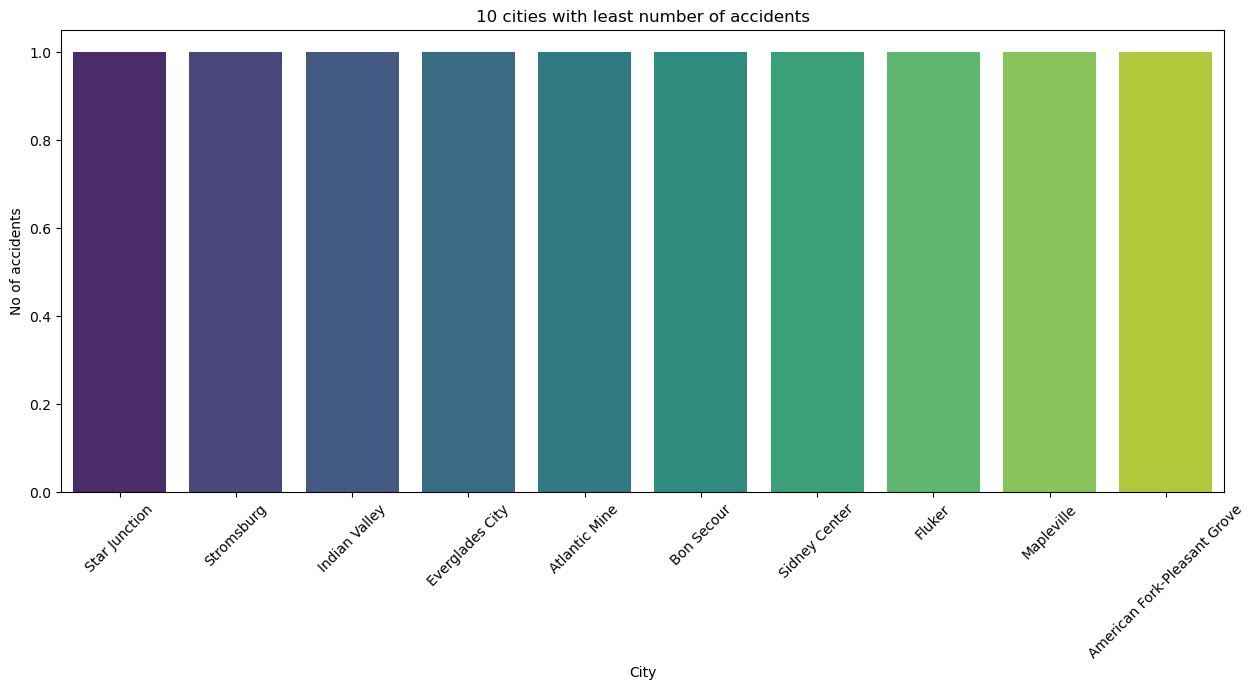

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10),palette='viridis')
plt.title("10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()



Star Junction and Stromsburg are among the cities with the least number of accidents, possibly due to their smaller size and lower traffic

# State with most and least Number of accidents


In [21]:

state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc


,State,count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


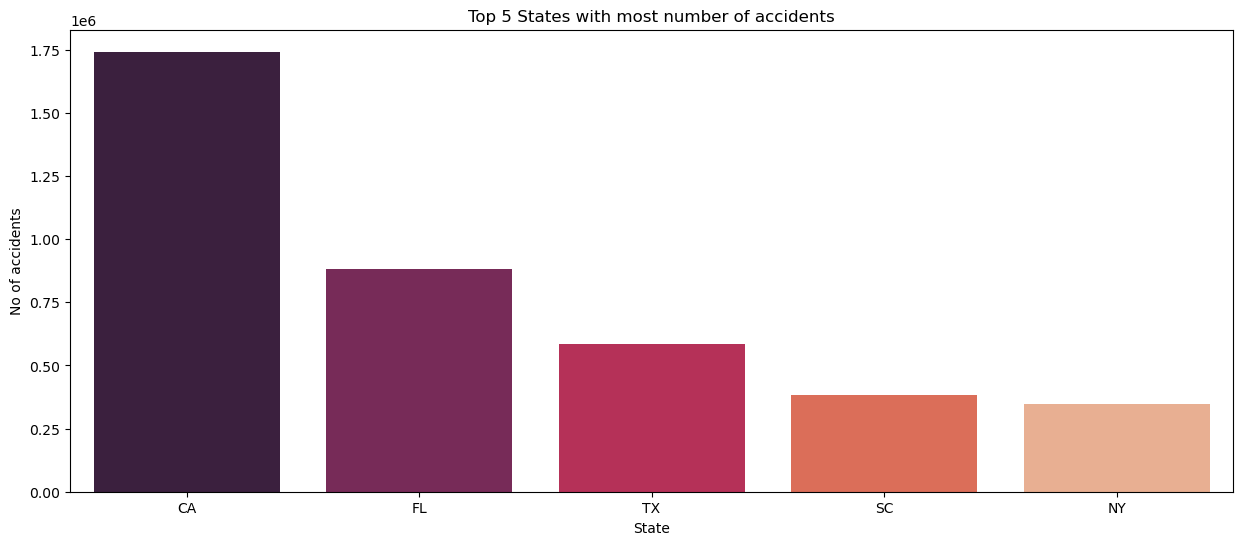

In [22]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.head(5),palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

California is the state with highest cases of accident, which aligns with its large population and extensive road network.

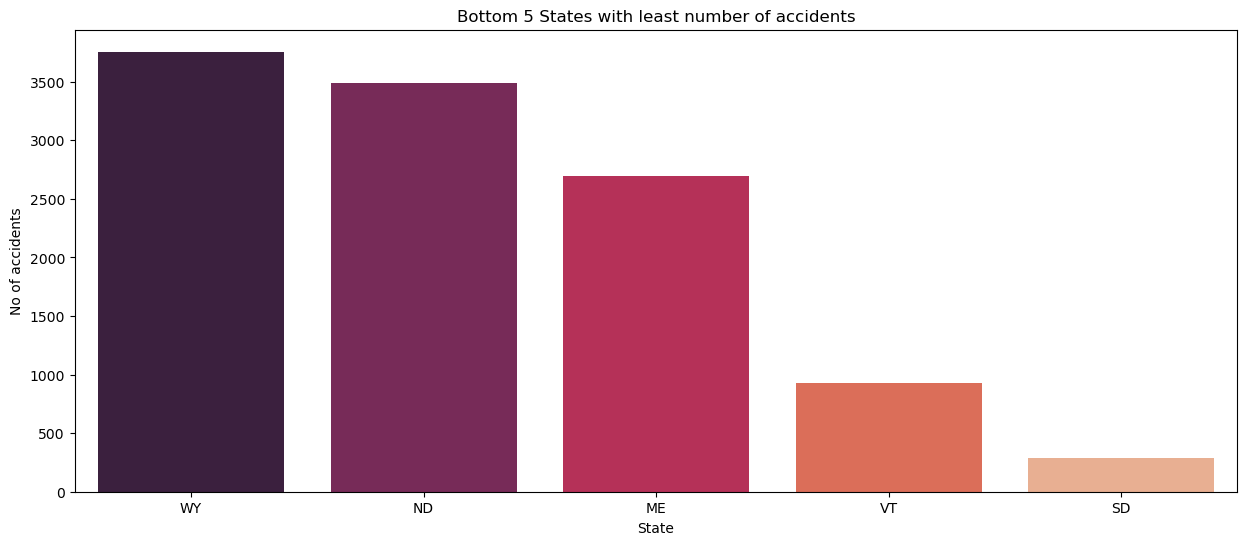

In [23]:
## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.tail(5),palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()


South Dakota(SD) is the state with least cases of accident,likely due to its lower population density and traffic volume.

In [24]:
df['Severity'].value_counts().index


Index([2, 3, 4, 1], dtype='int64', name='Severity')

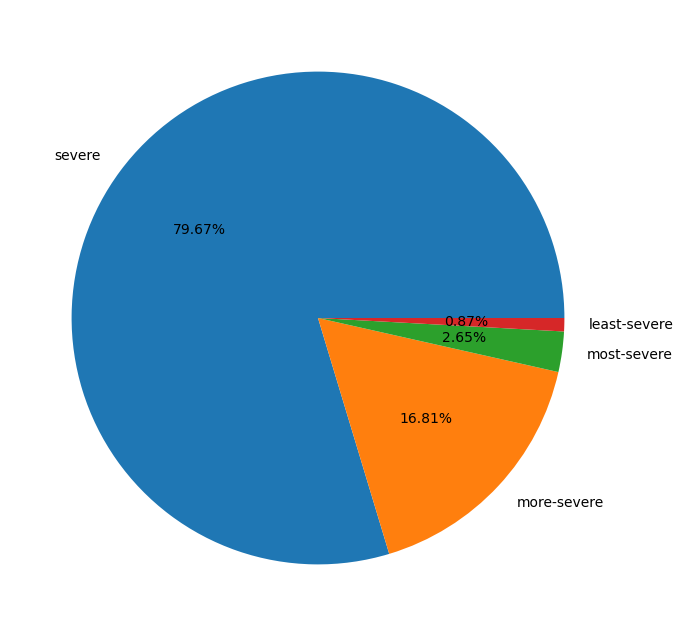

In [25]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

The severity of accidents is categorized into four levels: 1, 2, 3, and 4.
Most people experienced accidents at severity level 2, suggesting that while many accidents occurred, they were not extremely severe.



In [26]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [27]:
# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

In [28]:
# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2016-02-08 05:46:00  2016.0
1 2016-02-08 06:07:59  2016.0
2 2016-02-08 06:49:27  2016.0
3 2016-02-08 07:23:34  2016.0
4 2016-02-08 07:39:07  2016.0


In [29]:
df['Year'].value_counts()


Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

# Years with most number of accidents


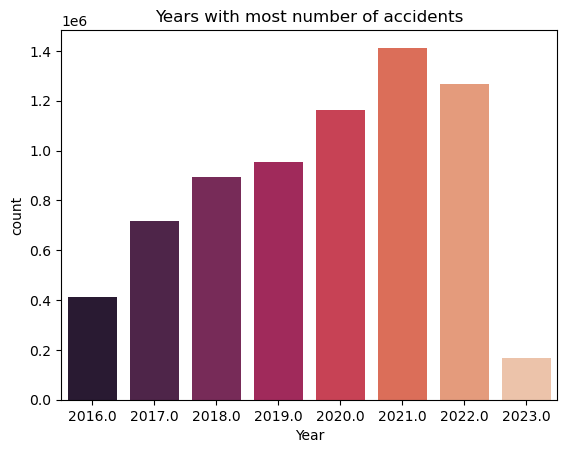

In [30]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x='Year',y='count',data=year_count,palette='rocket')
plt.title("Years with most number of accidents")
plt.show()

Year 2021 had highest accident rates,indicating a potential increase in traffic or changes in reporting during this period.

# Number of accidents at different time zones

In [31]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [32]:
morning_start = pd.to_datetime('05:00:00').time()
morning_end = pd.to_datetime('12:00:00').time()
afternoon_end = pd.to_datetime('17:00:00').time()
evening_end = pd.to_datetime('21:00:00').time()

In [33]:
conditions = [
    (df['Start_Time'].dt.time >= morning_start) & (df['Start_Time'].dt.time < morning_end),
    (df['Start_Time'].dt.time >= morning_end) & (df['Start_Time'].dt.time < afternoon_end),
    (df['Start_Time'].dt.time >= afternoon_end) & (df['Start_Time'].dt.time < evening_end),
    (df['Start_Time'].dt.time >= evening_end) | (df['Start_Time'].dt.time < morning_start)
]
choices = ['Morning', 'Afternoon', 'Evening', 'Night']

In [34]:
df['Time_Category'] = np.select(conditions, choices, default='Unknown')

In [35]:
print(df[['ID', 'Start_Time', 'Time_Category']])

                ID          Start_Time Time_Category
0              A-1 2016-02-08 05:46:00       Morning
1              A-2 2016-02-08 06:07:59       Morning
2              A-3 2016-02-08 06:49:27       Morning
3              A-4 2016-02-08 07:23:34       Morning
4              A-5 2016-02-08 07:39:07       Morning
...            ...                 ...           ...
7728389  A-7777757 2019-08-23 18:03:25       Evening
7728390  A-7777758 2019-08-23 19:11:30       Evening
7728391  A-7777759 2019-08-23 19:00:21       Evening
7728392  A-7777760 2019-08-23 19:00:21       Evening
7728393  A-7777761 2019-08-23 18:52:06       Evening

[7728394 rows x 3 columns]


In [36]:
# Group by Time_Category and count occurrences
time_zone_counts = df.groupby('Time_Category').size().reset_index(name='Accident_Count')

# Display the result
print(time_zone_counts)

  Time_Category  Accident_Count
0     Afternoon         2047528
1       Evening         1376175
2       Morning         2643097
3         Night          918428
4       Unknown          743166


In [37]:
filtered_df = df[df['Time_Category'] != 'Unknown']

# Count accidents in different time categories after filtering
accident_counts = filtered_df['Time_Category'].value_counts().reset_index()
accident_counts.columns = ['Time_Category', 'Accident_Count']

# Display the result
accident_counts

,Time_Category,Accident_Count
0,Morning,2643097
1,Afternoon,2047528
2,Evening,1376175
3,Night,918428


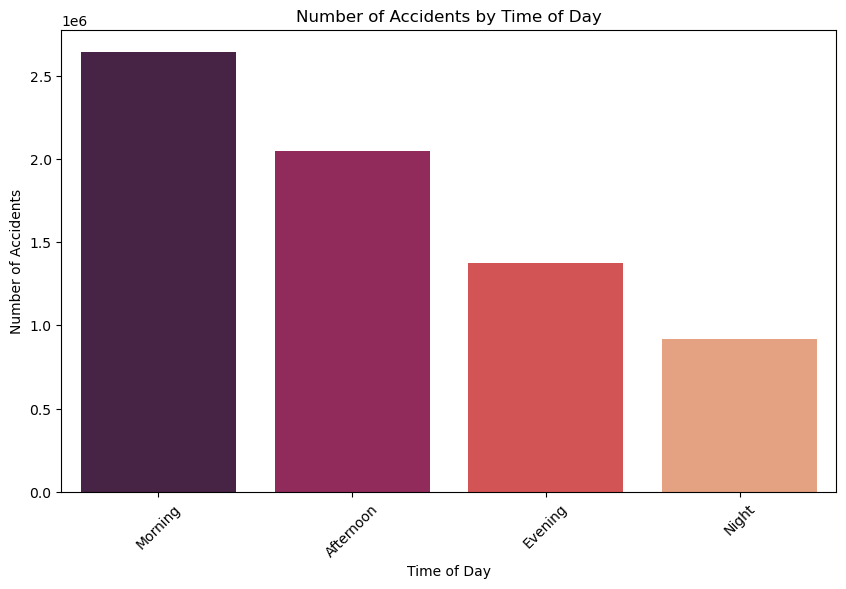

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_Category', y='Accident_Count', data=accident_counts, palette='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Most accidents occurred in the morning, potentially due to rush hour traffic when more people are commuting to work or school.

# Weather conditions at the time of accidents


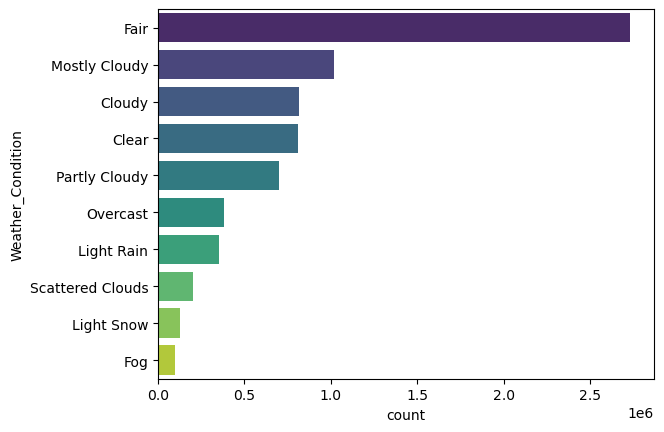

In [39]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')
plt.show()


Fair weather conditions were prevalent during most of the accidents, indicating that factors other than adverse weather, such as driver behavior or traffic congestion, may play a significant role in accident occurrences.

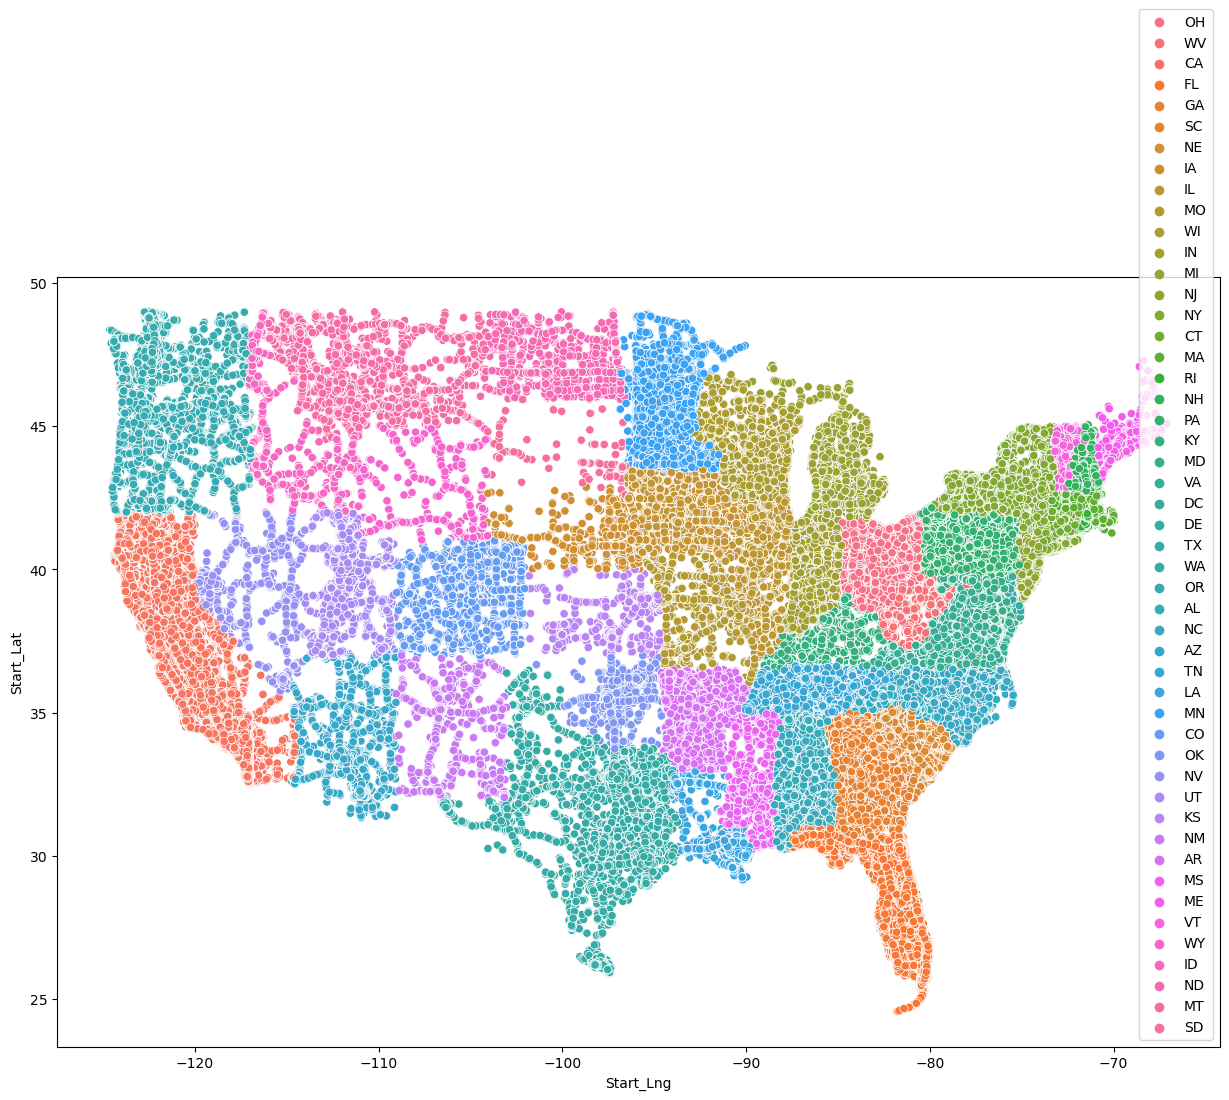

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()


These observations provide valuable insights into traffic patterns and accident hotspots, which can inform policy decisions, urban planning, and safety measures aimed at reducing the incidence and severity of accidents.